In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9f214ec0223b813c108744ac26b9b5cf1bc7fee0a3fbcbf71b6d0c321858a388
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input for camera

universe = np.arange(0, 3, 100) # 0.2 --> 1 meters
universe1 = np.arange(-255, 255, 100) # 0 --> 12V 
sensor1 = ctrl.Antecedent(universe, 'sensor1')
sensor2 = ctrl.Antecedent(universe, 'sensor2')
sensor3 = ctrl.Antecedent(universe, 'sensor3')
#output
wheel1 = ctrl.Consequent(universe1, 'wheel1')
wheel2 = ctrl.Consequent(universe1, 'wheel2')

#------------------#
sensor1['VC'] = fuzz.gaussmf(sensor1.universe, 0.5, 0.5)
sensor1['C'] = fuzz.gaussmf(sensor1.universe, 1.5, 0.5)
sensor1['F'] = fuzz.gaussmf(sensor1.universe, 2.5, 0.5)
#------------------#
sensor2['VC'] = fuzz.gaussmf(sensor1.universe, 0.5, 0.5)
sensor2['C'] = fuzz.gaussmf(sensor1.universe, 1.5, 0.5)
sensor2['F'] = fuzz.gaussmf(sensor1.universe, 2.5, 0.5)
#------------------#
sensor3['VC'] = fuzz.gaussmf(sensor1.universe, 0.5, 0.5)
sensor3['C'] = fuzz.gaussmf(sensor1.universe, 1.5, 0.5)
sensor3['F'] = fuzz.gaussmf(sensor1.universe, 2.5, 0.5)
#------------------#
wheel1['F'] = fuzz.gaussmf(wheel1.universe, -128, 20) #Front
wheel1['B'] = fuzz.gaussmf(wheel1.universe, 128, 20) #Back

#------------------#
wheel2['F'] = fuzz.gaussmf(wheel2.universe, -128, 20)
wheel2['B'] = fuzz.gaussmf(wheel2.universe, 123, 20)



rule0 = ctrl.Rule(antecedent=((sensor1['VC'] & sensor2['C'] & sensor3['VC']) | (sensor1['VC'] & sensor2['C'] & sensor3['C']) | (sensor1['VC'] & sensor2['F'] & sensor3['VC']) | (sensor1['VC'] & sensor2['F'] & sensor3['C'])
 | (sensor1['VC'] & sensor2['F'] & sensor3['F']) | (sensor1['C'] & sensor2['C'] & sensor3['VC'])
 | (sensor1['C'] & sensor2['C'] & sensor3['C']) | (sensor1['C'] & sensor2['C'] & sensor3['F'])
 | (sensor1['C'] & sensor2['F'] & sensor3['VC']) | (sensor1['C'] & sensor2['F'] & sensor3['C'])
 | (sensor1['C'] & sensor2['F'] & sensor3['F']) | (sensor1['F'] & sensor2['C'] & sensor3['C']) | (sensor1['F'] & sensor2['F'] & sensor3['VC'])
 | (sensor1['F'] & sensor2['F'] & sensor3['C']) | (sensor1['F'] & sensor2['F'] & sensor3['F'])),consequent = wheel1['F'],label= 'rule Forward')


rule1 = ctrl.Rule(antecedent=((sensor1['VC'] & sensor2['VC'] & sensor3['VC']) | (sensor1['VC'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['VC'] & sensor2['VC'] & sensor3['F']) | (sensor1['VC'] & sensor2['C'] & sensor3['F']) 
 | (sensor1['F'] & sensor2['VC'] & sensor3['F']) | (sensor1['F'] & sensor2['C'] & sensor3['F'])),consequent = wheel1['F'],label= 'rule Spin right')


rule2 = ctrl.Rule(antecedent=((sensor1['C'] & sensor2['VC'] & sensor3['VC']) | (sensor1['C'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['C'] & sensor2['VC'] & sensor3['F'])),consequent = wheel1['B'], label= 'rule Backward')


rule3 = ctrl.Rule(antecedent=((sensor1['F'] & sensor2['VC'] & sensor3['VC']) | (sensor1['F'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['F'] & sensor2['C'] & sensor3['VC'])),consequent = wheel1['B'], label= 'rule Spin right')
#----------------------------------------------------------------------------------------------------#
rule4 = ctrl.Rule(antecedent=((sensor1['VC'] & sensor2['C'] & sensor3['VC']) | (sensor1['VC'] & sensor2['C'] & sensor3['C']) | (sensor1['VC'] & sensor2['F'] & sensor3['VC']) | (sensor1['VC'] & sensor2['F'] & sensor3['C'])
 | (sensor1['VC'] & sensor2['F'] & sensor3['F']) | (sensor1['C'] & sensor2['C'] & sensor3['VC'])
 | (sensor1['C'] & sensor2['C'] & sensor3['C']) | (sensor1['C'] & sensor2['C'] & sensor3['F'])
 | (sensor1['C'] & sensor2['F'] & sensor3['VC']) | (sensor1['C'] & sensor2['F'] & sensor3['C'])
 | (sensor1['C'] & sensor2['F'] & sensor3['F']) | (sensor1['F'] & sensor2['C'] & sensor3['C']) | (sensor1['F'] & sensor2['F'] & sensor3['VC'])
 | (sensor1['F'] & sensor2['F'] & sensor3['C']) | (sensor1['F'] & sensor2['F'] & sensor3['F'])), consequent = wheel2['F'], label= 'rule Forward')


rule5 = ctrl.Rule(antecedent=((sensor1['VC'] & sensor2['VC'] & sensor3['VC']) | (sensor1['VC'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['VC'] & sensor2['VC'] & sensor3['F']) | (sensor1['VC'] & sensor2['C'] & sensor3['F']) 
 | (sensor1['F'] & sensor2['VC'] & sensor3['F']) | (sensor1['F'] & sensor2['C'] & sensor3['F'])), consequent = wheel2['B'],label= 'rule Spin right')


rule6 = ctrl.Rule(antecedent=((sensor1['C'] & sensor2['VC'] & sensor3['VC']) | (sensor1['C'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['C'] & sensor2['VC'] & sensor3['F'])), consequent = wheel2['B'], label= 'rule Backward')


rule7 = ctrl.Rule(antecedent=((sensor1['F'] & sensor2['VC'] & sensor3['VC']) | (sensor1['F'] & sensor2['VC'] & sensor3['C'])
 | (sensor1['F'] & sensor2['C'] & sensor3['VC'])), consequent = wheel2['F'], label= 'rule Spin right')

system = ctrl.ControlSystem(rules=[rule0, rule1, rule2,rule3])
system1 = ctrl.ControlSystem(rules=[rule4, rule5, rule6,rule7])
sim = ctrl.ControlSystemSimulation(system)
sim1 = ctrl.ControlSystemSimulation(system1)
sim.input['sensor1'] = 1
sim.input['sensor2'] = 1
sim.input['sensor3'] = 0.75

sim1.input['sensor1'] = 1
sim1.input['sensor2'] = 1
sim1.input['sensor3'] = 0.75

sensor1.view()
sensor2.view()
sensor3.view()
sim.compute()
sim1.compute()
print(sim.output['wheel1'])
wheel1.view(sim = sim)
print(sim1.output['wheel2'])
wheel2.view(sim = sim1)

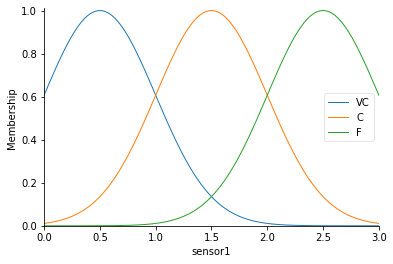

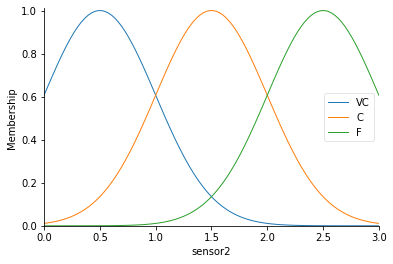

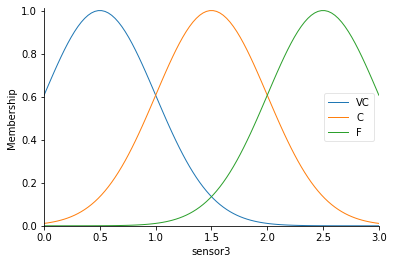

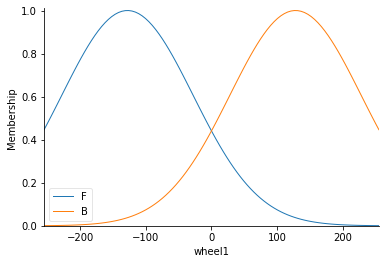

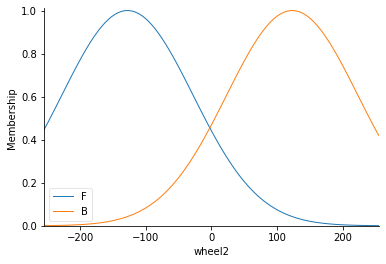

In [ ]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input for camera

universe  = np.linspace(0, 3, 100) # 0.2 --> 1 meters
universe1 = np.linspace(-255, 255, 100) # 0 --> 12V 
universe2 = np.linspace(0,90,89)
universe3 = np.linspace(-90,0,89)

sensor1 = ctrl.Antecedent(universe, 'sensor1')
sensor2 = ctrl.Antecedent(universe, 'sensor2')
sensor3 = ctrl.Antecedent(universe, 'sensor3')
#output
wheel1 = ctrl.Consequent(universe1, 'wheel1')
wheel2 = ctrl.Consequent(universe1, 'wheel2')

#------------------#
sensor1['VC'] = fuzz.gaussmf(sensor1.universe, 0.5, 0.5)
sensor1['C'] = fuzz.gaussmf(sensor1.universe, 1.5, 0.5)
sensor1['F'] = fuzz.gaussmf(sensor1.universe, 2.5, 0.5)
sensor1.view()
#------------------#
sensor2['VC'] = fuzz.gaussmf(sensor1.universe, 0.5, 0.5)
sensor2['C'] = fuzz.gaussmf(sensor1.universe, 1.5, 0.5)
sensor2['F'] = fuzz.gaussmf(sensor1.universe, 2.5, 0.5)
sensor2.view()
#------------------#
sensor3['VC'] = fuzz.gaussmf(sensor1.universe, 0.5, 0.5)
sensor3['C'] = fuzz.gaussmf(sensor1.universe, 1.5, 0.5)
sensor3['F'] = fuzz.gaussmf(sensor1.universe, 2.5, 0.5)
sensor3.view()
#------------------#
wheel1['F'] = fuzz.gaussmf(wheel1.universe, -128, 100) #Front
wheel1['B'] = fuzz.gaussmf(wheel1.universe, 128, 100) #Back
wheel1.view()

#------------------#
wheel2['F'] = fuzz.gaussmf(wheel2.universe, -128, 100)
wheel2['B'] = fuzz.gaussmf(wheel2.universe, 123, 100)
wheel2.view()